# Repaso - Clústering y PCA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#Explorar la base de datos
df_productos=pd.read_excel('7.1 ProductosCarnicos.xlsx')
df_productos

,No.,Nombre del Negocio,Localidad,Barrio,Tipo Tienda,CanalAtencion,CantidadReferencias,NivelSocioEconómico,CompraMes1,Antigüedad,CompraMes2,MtsCuadrados,Utilidad,QTrabajadores,TiendasCompetencia
0,1,Tienda 1,PUENTE ARANDA,CUNDINAMARCA,Carniceria_Pesqueria_Fama,Vendedor,2,3,100000,0,143000,12,0.069,2,1
1,2,Tienda 2,TEUSAQUILLO,CIUDAD SALITRE SUR-ORIENTAL,Carniceria_Pesqueria_Fama,Vendedor,6,4,200000,1,279000,28,0.055,3,4
2,3,Tienda 3,TEUSAQUILLO,PAULO VI,Carniceria_Pesqueria_Fama,Telemercadeo,7,4,300000,4,352000,22,0.089,2,1
3,4,Tienda 4,FONTIBON,LA ESPERANZA NORTE,Carniceria_Pesqueria_Fama,Mercaderista,5,1,400000,6,426000,14,0.063,1,0
4,5,Tienda 5,TEUSAQUILLO,LA ESMERALDA,Carniceria_Pesqueria_Fama,Vendedor,8,4,500000,2,589000,21,0.065,3,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,195,Tienda 195,PUENTE ARANDA,ESTACION CENTRAL,Tienda_Cafeteria,Vendedor,8,1,800000,3,768000,23,0.096,2,2
195,196,Tienda 196,TEUSAQUILLO,CIUDAD SALITRE SUR-ORIENTAL,Comidas rapidas,Vendedor,4,1,1000000,1,917000,14,0.123,2,3
196,197,Tienda 197,TEUSAQUILLO,CIUDAD SALITRE SUR-ORIENTAL,Comidas rapidas,Vendedor,4,4,600000,2,558000,16,0.111,1,2
197,198,Tienda 198,FONTIBON,LA ESPERANZA SUR,Comidas rapidas,Vendedor,5,3,200000,1,188000,12,0.056,1,1


In [7]:
df_productos.info()

#Ver los valores que tienen las variables categóricas
df_productos['Localidad'].unique()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199 entries, 0 to 198
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   No.                  199 non-null    int64  
 1   Nombre del Negocio   199 non-null    object 
 2   Localidad            199 non-null    object 
 3   Barrio               199 non-null    object 
 4   Tipo Tienda          199 non-null    object 
 5   CanalAtencion        199 non-null    object 
 6   CantidadReferencias  199 non-null    int64  
 7   NivelSocioEconómico  199 non-null    int64  
 8   CompraMes1           199 non-null    int64  
 9   Antigüedad           199 non-null    int64  
 10  CompraMes2           199 non-null    int64  
 11  MtsCuadrados         199 non-null    int64  
 12  Utilidad             199 non-null    float64
 13  QTrabajadores        199 non-null    int64  
 14  TiendasCompetencia   199 non-null    int64  
dtypes: float64(1), int64(9), object(5)
memor

array(['PUENTE ARANDA', 'TEUSAQUILLO', 'FONTIBON', 'BARRIOS UNIDOS'],
      dtype=object)

In [17]:
df_productos_num=df_productos.drop(['No.','Nombre del Negocio','Localidad','Barrio','Tipo Tienda','CanalAtencion'], axis=1)
df_productos_num

,CantidadReferencias,NivelSocioEconómico,CompraMes1,Antigüedad,CompraMes2,MtsCuadrados,Utilidad,QTrabajadores,TiendasCompetencia
0,2,3,100000,0,143000,12,0.069,2,1
1,6,4,200000,1,279000,28,0.055,3,4
2,7,4,300000,4,352000,22,0.089,2,1
3,5,1,400000,6,426000,14,0.063,1,0
4,8,4,500000,2,589000,21,0.065,3,4
...,...,...,...,...,...,...,...,...,...
194,8,1,800000,3,768000,23,0.096,2,2
195,4,1,1000000,1,917000,14,0.123,2,3
196,4,4,600000,2,558000,16,0.111,1,2
197,5,3,200000,1,188000,12,0.056,1,1


## PCA 

In [ ]:
#Importamos el standard scaler
from sklearn.preprocessing import StandardScaler

#Escalar
scaler=StandardScaler()
df_productos_num_scaled=scaler.fit_transform(df_productos_num)

df_productos_num_scaled

array([[-1.12496936, -0.17520008, -1.35614559, ..., -0.87292386,
        -0.28165297, -0.63806008],
       [-0.27132245,  0.76709223, -1.00290872, ..., -1.44447871,
         0.68470809,  1.46648063],
       [-0.05791072,  0.76709223, -0.64967184, ..., -0.05641694,
        -0.28165297, -0.63806008],
       ...,
       [-0.69814591,  0.76709223,  0.41003879, ...,  0.84174068,
        -1.24801403,  0.06345349],
       [-0.48473418, -0.17520008, -1.00290872, ..., -1.40365336,
        -1.24801403, -0.63806008],
       [ 1.00914792, -2.0597847 , -0.29643497, ...,  0.10688445,
         2.61743021, -1.33957365]])

In [34]:
#Import PCA
from sklearn.decomposition import PCA

#Crear el objeto PCA
pca=PCA()
df_productos_pca=pca.fit_transform(df_productos_num_scaled)

#Resumen de la varianza
varianza_explicada=pca.explained_variance_ratio_
varianza_acum=np.cumsum(varianza_explicada)

varianza_acum

array([0.31116925, 0.53828706, 0.66249562, 0.77566743, 0.87103514,
       0.94201557, 0.97614467, 0.99893993, 1.        ])

In [39]:
#Crear el objeto PCA - 4 
pca_4=PCA(n_components=4)
df_productos_pca_4=pca_4.fit_transform(df_productos_num_scaled)

df=pd.DataFrame(df_productos_pca_4)
df


,0,1,2,3
0,-2.494125,-1.129879,-0.933355,-0.878543
1,-0.398634,-2.081099,1.376616,-0.512312
2,-0.560226,-0.538319,0.203038,0.096981
3,-1.110523,0.023706,-1.867480,1.697768
4,0.284917,-0.513310,1.472061,-0.395240
...,...,...,...,...
194,0.774385,1.225820,-1.238735,0.875070
195,-0.007629,2.924803,-1.130330,0.402767
196,-1.246791,1.458756,0.478040,-0.571117
197,-2.276241,-0.926000,-0.630342,-0.811760


In [44]:
pca_4_autovectores = pca_4.components_

df_eigenvectors=pd.DataFrame(pca_4_autovectores)

df_eigenvectors

,0,1,2,3,4,5,6,7,8
0,0.513838,-0.019259,0.384789,0.155815,0.395051,0.451586,-0.073691,0.438967,-0.071705
1,-0.144744,-0.022067,0.510250,0.039623,0.498565,-0.341889,0.510622,-0.299274,0.029695
2,0.081208,0.667113,0.008826,0.202764,0.023192,0.046728,-0.070450,-0.112287,0.697769
3,-0.143716,-0.465281,-0.109061,0.796647,-0.111103,0.038644,0.158375,0.090436,0.263097


## K Means

In [47]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


### Codo

In [53]:
range_n_clusters = range(2,15)
inertias=[]

for n in range_n_clusters:
    modelo_kmeans=KMeans(n_clusters=n,n_init=20, random_state=123)
    modelo_kmeans.fit(df)
    inertias.append(modelo_kmeans.inertia_)

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

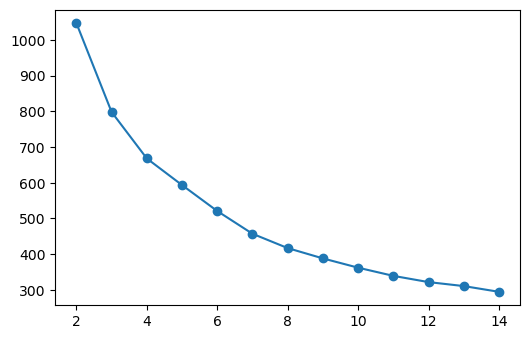

In [54]:
#Graficar el codo
fig, ax = plt.subplots(1,1,figsize=(6,3.84))
ax.plot(range_n_clusters, inertias, marker = 'o')

### Silhouette

In [ ]:
silhouttes = []

for n in range_n_clusters:
    modelo_kmeans=KMeans(n_clusters=n,n_init=20, random_state=123)
    labels = modelo_kmeans.fit_predict(df)
    silhouette_avg = silhouette_score(df,labels)
    silhouttes.append(silhouette_avg)


c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Window

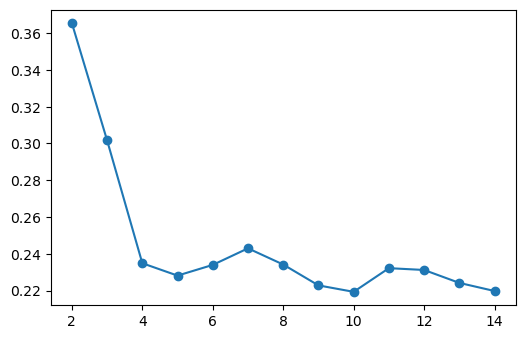

In [56]:
#Graficar el codo
fig, ax = plt.subplots(1,1,figsize=(6,3.84))
ax.plot(range_n_clusters, silhouttes, marker = 'o')

### Clústers

In [62]:
modelo_kmeans_3=KMeans(n_clusters=3,n_init=20, random_state=123)
labels = modelo_kmeans_3.fit_predict(df)

labels

c:\ProgramData\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1419: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 2, 0, 0, 2, 0, 1, 0, 2, 2, 0, 2, 2, 1, 2, 2, 0, 2, 2, 2,
       2, 0, 2, 1, 1, 1, 0, 1, 1, 1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0,
       0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 2,
       0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 2, 0, 2, 0, 1, 2,
       0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       1], dtype=int32)

# Análisis final

In [ ]:
df_productos['Cluster'] = labels
df_productos

,No.,Nombre del Negocio,Localidad,Barrio,Tipo Tienda,CanalAtencion,CantidadReferencias,NivelSocioEconómico,CompraMes1,Antigüedad,CompraMes2,MtsCuadrados,Utilidad,QTrabajadores,TiendasCompetencia,Cluster
0,1,Tienda 1,PUENTE ARANDA,CUNDINAMARCA,Carniceria_Pesqueria_Fama,Vendedor,2,3,100000,0,143000,12,0.069,2,1,0
1,2,Tienda 2,TEUSAQUILLO,CIUDAD SALITRE SUR-ORIENTAL,Carniceria_Pesqueria_Fama,Vendedor,6,4,200000,1,279000,28,0.055,3,4,0
2,3,Tienda 3,TEUSAQUILLO,PAULO VI,Carniceria_Pesqueria_Fama,Telemercadeo,7,4,300000,4,352000,22,0.089,2,1,0
3,4,Tienda 4,FONTIBON,LA ESPERANZA NORTE,Carniceria_Pesqueria_Fama,Mercaderista,5,1,400000,6,426000,14,0.063,1,0,0
4,5,Tienda 5,TEUSAQUILLO,LA ESMERALDA,Carniceria_Pesqueria_Fama,Vendedor,8,4,500000,2,589000,21,0.065,3,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
194,195,Tienda 195,PUENTE ARANDA,ESTACION CENTRAL,Tienda_Cafeteria,Vendedor,8,1,800000,3,768000,23,0.096,2,2,2
195,196,Tienda 196,TEUSAQUILLO,CIUDAD SALITRE SUR-ORIENTAL,Comidas rapidas,Vendedor,4,1,1000000,1,917000,14,0.123,2,3,2
196,197,Tienda 197,TEUSAQUILLO,CIUDAD SALITRE SUR-ORIENTAL,Comidas rapidas,Vendedor,4,4,600000,2,558000,16,0.111,1,2,2
197,198,Tienda 198,FONTIBON,LA ESPERANZA SUR,Comidas rapidas,Vendedor,5,3,200000,1,188000,12,0.056,1,1,0


In [64]:
element_counts = df_productos['Cluster'].value_counts()
element_counts

Cluster
0    128
2     49
1     22
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x26bf314e350>,
 [Text(-0.47838932397331674, 0.9905269580926878, '0'),
  Text(0.11267839036927967, -1.0942136812998584, '2'),
  Text(1.034320205499096, -0.37440848347267436, '1')],
 [Text(-0.2609396312581727, 0.5402874316869205, '64.3%'),
  Text(0.061460940201425264, -0.5968438261635591, '24.6%'),
  Text(0.5641746575449614, -0.20422280916691327, '11.1%')])

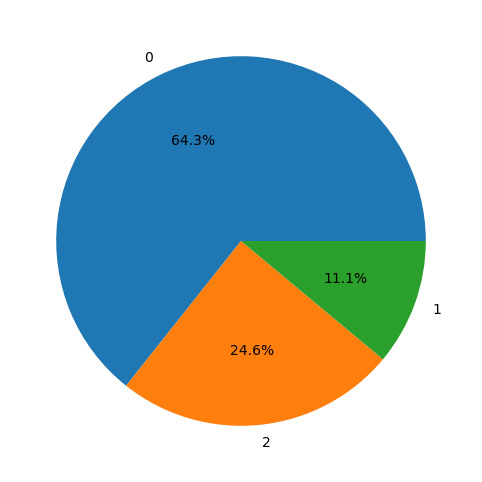

In [66]:
# Gráfico circular

fig, ax = plt.subplots(1,1,figsize=(12,6))

ax.pie(element_counts, labels=element_counts.index, autopct='%1.1f%%')

In [ ]:
promedios = df_productos.groupby("Cluster")[['CantidadReferencias', 'NivelSocioEconómico', 'CompraMes1', 'CompraMes2', 'Antigüedad', 'Utilidad']].mean()

,CantidadReferencias,NivelSocioEconómico,CompraMes1,CompraMes2,Antigüedad,Utilidad
Cluster,,,,,,
0,6.625000,3.328125,330468.750000,370781.250000,2.406250,0.081172
1,16.590909,2.863636,795454.545455,846454.545455,3.954545,0.080045
2,4.775510,2.959184,744897.959184,778755.102041,2.775510,0.119082


([<matplotlib.axis.XTick at 0x26bf9e687d0>,
 [Text(0, 0, 'CantidadReferencias'),
  Text(1, 0, 'NivelSocioEconómico'),
  Text(2, 0, 'CompraMes1'),
  Text(3, 0, 'CompraMes2'),
  Text(4, 0, 'Antigüedad'),
  Text(5, 0, 'Utilidad')])

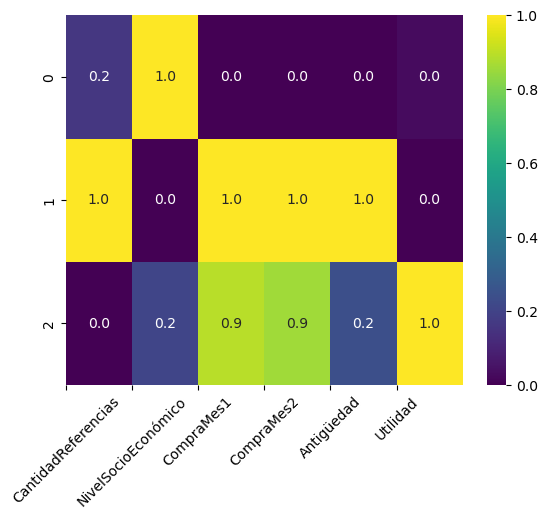

In [89]:
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

minmax=MinMaxScaler()
promedios_scaled=minmax.fit_transform(promedios)

plt.figsize=(20,6)
feature_names = ['CantidadReferencias', 'NivelSocioEconómico', 'CompraMes1', 'CompraMes2', 'Antigüedad', 'Utilidad']
sns.heatmap(promedios_scaled, cmap='viridis', fmt='.1f', annot=promedios_scaled)
plt.xticks(ticks = range(len(feature_names)),labels=feature_names, rotation = 45)

## Cluster Jerárquico

In [93]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram

In [96]:
modelo_agglomerative=AgglomerativeClustering(metric= 'euclidean',
                                        linkage='complete',
                                        distance_threshold=0,
                                        n_clusters=None)

modelo_agglomerative.fit(df_productos_num_scaled) 


AgglomerativeClustering(distance_threshold=0, linkage='complete',
                        n_clusters=None)

In [97]:
## Funcion para crear en dendrograma a partir de las distancias y la iteración e ingreso de nodos hijos/terminales a un nuevo grupo (o no)
def plot_dendrogram(model, **kwargs):
    '''
    Esta función extrae la información de un modelo AgglomerativeClustering
    y representa su dendograma con la función dendogram de scipy.cluster.hierarchy
    '''

    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot
    dendrogram(linkage_matrix, **kwargs)

Text(0.5, 1.0, 'Dendrograma')

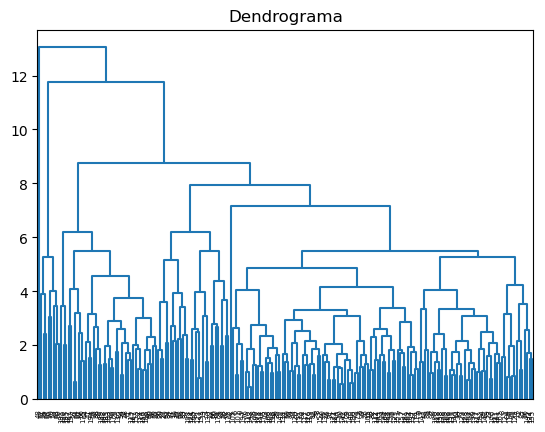

In [99]:
plot_dendrogram(modelo_agglomerative, color_threshold=0)
plt.title('Dendrograma')